# Analysis of Resource Ratios

In [1]:
from __future__ import annotations

import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

import json

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from src.extra.io import save_plot

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
results_filename = '../data/resource_ratio/resource_ratio_synthetic_t15_s3_dt06-11_11-34-15.json'

with open(results_filename) as file:
    ratio_resource_data = json.load(file)

In [3]:
ratios = [ratio for ratio in ratio_resource_data[0].keys() if ratio != 'model']
ratio_labels = ['1:9', '1:4', '3:7', '2:3', '1:1', '3:2', '7:3', '4:1', '9:1']

greedy_name = 'Greedy Utility * deadline / Sum, Sum, Percent Sum'
algorithms = [('Elastic Greedy Algorithm', greedy_name),
              ('Non-Elastic Optimal', 'Non-elastic Optimal')]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: figs/eps/resource_ratio_social_welfare.eps
Save file location: figs/png/resource_ratio_social_welfare.png
Save file location: figs/pdf/resource_ratio_social_welfare.pdf


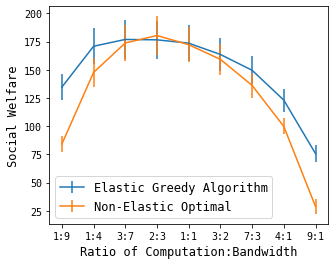

In [4]:
_, ax = plt.subplots(figsize=(5, 4))
for name, algo in algorithms:
    social_welfare = [[model_data[ratio][algo]['social welfare']
                       for model_data in ratio_resource_data] for ratio in ratios]
    error = 1.96 * np.std(social_welfare, axis=1) / np.sqrt(len(ratio_resource_data))
    ax.errorbar(x=ratios, y=np.mean(social_welfare, axis=1), yerr=error, label=name)

ax.set_ylabel('Social Welfare', fontsize=12)
ax.set_xlabel('Ratio of Computation:Bandwidth', fontsize=12)
ax.set_xticks(ratios)
ax.set_xticklabels(ratio_labels)

plt.legend(fontsize=12)
save_plot('resource_ratio_social_welfare')

## Resource ratio social welfare percentage average

In [5]:
for ratio in ratios:
    difference = np.mean([result[ratio][greedy_name]['social welfare percent'] -
                          result[ratio]['Non-elastic Optimal']['social welfare percent']
                          for result in ratio_resource_data])
    print(f'{ratio.title()} - difference: {difference:.3f}')

Ratio 0.1 - difference: 0.266
Ratio 0.2 - difference: 0.119
Ratio 0.3 - difference: 0.015
Ratio 0.4 - difference: -0.020
Ratio 0.5 - difference: 0.007
Ratio 0.6 - difference: 0.021
Ratio 0.7 - difference: 0.068
Ratio 0.8 - difference: 0.122
Ratio 0.9 - difference: 0.248


### Resource ratio server resource usage

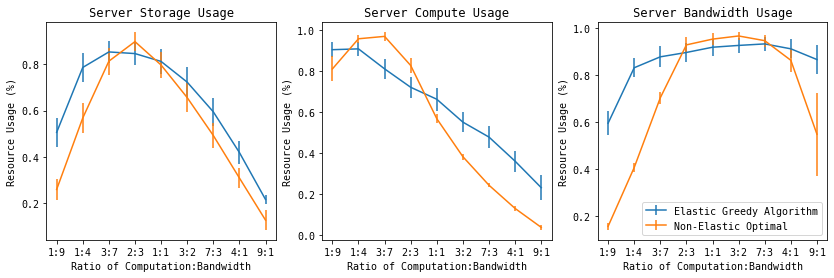

In [6]:
flatten = lambda t: [item for sublist in t for item in sublist]

_, axs = plt.subplots(ncols=3, figsize=(14, 4))
for ax, resource in zip(axs, ['server storage usage', 'server compute usage', 'server bandwidth usage']):
    ax.set_title(resource.title())
    for name, algo in algorithms:
        ratio_results = [flatten([list(model_data[ratio][algo][resource].values())
                                  for model_data in ratio_resource_data]) for ratio in ratios]
        ax.errorbar(ratios, np.mean(ratio_results, axis=1),
                    yerr=1.96 * np.std(ratio_results, axis=1) / np.sqrt(len(ratio_resource_data)), label=name)

    ax.set_xticks(ratios)
    ax.set_xticklabels(ratio_labels)
    ax.set_xlabel('Ratio of Computation:Bandwidth')
    ax.set_ylabel('Resource Usage (%)')

plt.legend()

## Resource ratio social welfare difference

Text(0.5, 0, 'Ratio of Computation:Bandwidth')

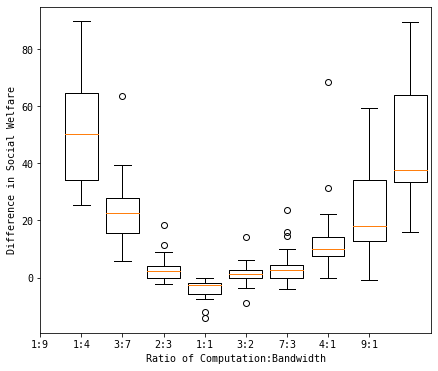

In [7]:
_, diff_ax = plt.subplots(figsize=(7, 6))

differences = [
    [result[ratio][greedy_name]['social welfare'] - result[ratio]['Non-elastic Optimal']['social welfare']
     for result in ratio_resource_data]
    for ratio in ratios
]

diff_ax.boxplot(differences, widths=0.8)
diff_ax.set_ylabel('Difference in Social Welfare')
plt.xticks(ticks=np.arange(len(ratios)),
           labels=ratio_labels)
diff_ax.set_xlabel('Ratio of Computation:Bandwidth')